# Project Description

**Finding a nice neighborhood to live in.**

Most adults during their life, have atleast made a single change of living location due to personal or professional reasons.  However finding a decent place where all the personal needs are met is highly stressful. Some people enjoy doing the detailed analysis by hand thereby figuring out following information like, 

1. the average rent in a neighborhood, 
2. transport amenities (both public and private), 
3. best schools for kids(if they have any, as this is a very important choice), 
4. average commute time from that neighborhood to work place, 
5. nearest hospitals, 
6. crime rates, 
7. police or communal violence,
8. political or racial tensions,
9. public health crisis in the last few years, 
10. tax rates
11. public places like parks,
12. places to have leisure sctivities like going to restaurants, movie theaters, saunas, gym, etc.,

These are few common things to consider during a relocation and they are very important for a healthy and stress free life. And doing an Online search for these is time consuming. In this project, we aim to meet atleast some common requirements like **public places, parks, restaurants etc.**  and guide the project users to choose atleast 1 or more neighborhoods for their consideration during their relocation. By rating the neighborhoods based upon the available amenities they have, we can recommend the neighborhood in a city in a ranked order. This is the goal of this project. 

**Target Audience:-**  
Someone who wants to relocate to a city based on available public services.

**Stakeholders:-**
1. Someone who wants to relocate to a city.
2. Myself. 

# Data Description

We use public libraries and API's in this project. We use Wikipedia and FourSquare API, Some common Python Libraries for programming. 

### Wikipedia:-
From wikipedia pages, we can identify the neighborhood around the city. Every major cities have these information in their wiki page. We access the web page and then extract the neighborhood information. 

**Date Type:-**
XML and HTML

**Duration:-**  
< 10 seconds

**Description of the data:-**  
Location coordinates obtained by Geocoder calls.

**Source:-**
(https://en.wikipedia.org/wiki/Main_Page)

### Foursquare API:

Foursquare provides a valuable and publically accessible location information like the ameneties in  nearby locations. We use their developer tools to access the required information about the neighboords in a city. Using these accessed information we then rank the neighborhoods based on the ameneties they have. These services are free of charge. 

We create a Foursquare developer account, and after that we provide some zip codes inside a city and for each zip code or LatLon info(Latitude and Longitude Points) we provided we extract details on the ameneties we expect a neighborhood should have. So we set the radius of this search around to zip code to be around 1km. 

**Date Type:-**
JSON

**Duration:-**  
N/A

**Description of the data:-**  
Location coordinates obtained by Foursquare API calls.

**Source:-**
(https://foursquare.com/)

### Public Programming Tools:-
We use some public plotting tools like Folium to visualize the  neighborhoods in the city we want to relocate. Then based upon the analysis of the above combined information we can update the Folium visualization to reflect the number of amenities in a neighborhood. 

### K-Means Clustering Algorithm on the Data:-
We can use K-Means Clustering algorithm to group amenities in an area, then we can reduce the number of individual amenities comparisons to be done against each neighborhood. We can do these comparisons against the types of amenities, individually, collectively, or alltogether. 

# Data Preprocessing

In order to learn about the neighborhood we use Wikipedia to Identify the list of neighborhoods in the city of Toronto. This is implemented in the following code.

In [20]:
import numpy as np
import pandas as pd
import requests
import lxml
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import geocoder
import warnings

from tqdm import tqdm
from IPython.display import Image 
from IPython.core.display import HTML
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup

warnings.filterwarnings('ignore')

from tqdm import tqdm
import sys
import linecache

def PrintException():
    exc_type, exc_obj, tb = sys.exc_info()
    f = tb.tb_frame
    lineno = tb.tb_lineno
    filename = f.f_code.co_filename
    linecache.checkcache(filename)
    line = linecache.getline(filename, lineno, f.f_globals)
    print('EXCEPTION IN ({}, LINE {} "{}"): {}'.format(filename, lineno, line.strip(), exc_obj))

%matplotlib inline

In [2]:
# Finding the postals codes, neighborhoods in Toronto, Canada
wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(wiki_page, 'lxml')
table = soup.find('table')
# table

toronto_table = soup.find('table',{'class':'wikitable sortable'})
links = toronto_table.findAll('td')

pincodes = []
count = 0
for x in links:
    if count == 0:
        x1 = x.text
        count += 1
    elif count == 1:
        x2 = x.text
        count +=1
    elif count == 2:
        x3 = x.text
        x3 = x3.replace('\n','')
        count = 0
        if x3 == 'Not assigned':
            x3 = x2
        if x2 != 'Not assigned':            
            pincodes.append((x1,x2,x3))
# print (pincodes)

result = {}
for x in pincodes:
    if x[0] in result:
        result[x[0]] = [x[0], x[1], result[x[0]][1] + ', ' + x[2]]
    else:
        result[x[0]] = [x[0], x[1], x[2]]
            
results = {}
for count, x in enumerate(result):
    results[count] = [x, result[x][1], result[x][2]]
    
# print(results)

toronto_data = pd.DataFrame.from_dict(results, orient='index', columns=['PostalCode', 'Borough', 'Neighborhood'])
toronto_data['latitude'] = None
toronto_data['longitude'] = None
# toronto_data['response'] = None
toronto_data

,PostalCode,Borough,Neighborhood,latitude,longitude
0,M3A,North York,Parkwoods,None,None
1,M4A,North York,Victoria Village,None,None
2,M5A,Downtown Toronto,"Downtown Toronto, Regent Park",None,None
3,M6A,North York,"North York, Lawrence Manor",None,None
4,M7A,Queen's Park,Queen's Park,None,None
5,M9A,Etobicoke,Islington Avenue,None,None
6,M1B,Scarborough,"Scarborough, Malvern",None,None
7,M3B,North York,Don Mills North,None,None
8,M4B,East York,"East York, Parkview Hill",None,None
9,M5B,Downtown Toronto,"Downtown Toronto, Garden District",None,None


In [24]:
toronto_data.head()

,PostalCode,Borough,Neighborhood,latitude,longitude
0,M3A,North York,Parkwoods,43.7588,-79.3202
1,M4A,North York,Victoria Village,43.7327,-79.3112
2,M5A,Downtown Toronto,"Downtown Toronto, Regent Park",None,None
3,M6A,North York,"North York, Lawrence Manor",None,None
4,M7A,Queen's Park,Queen's Park,49.2151,-122.906


# Data Analysis

## Finding Latitude and Longitude

1. After learning the neighborhood and its details, we prepare the address of each neighborhood and request Geolocator for their latitude and longitude in the following code. 
2. To verify the accuracy fo the latitude and the longitude values we call do reverse geolocation using the geocoder.

In [4]:
# Fidning the latitude and longitude of the postal codes in toronto
import geocoder
from tqdm import tqdm

# Parkwoods (37.8567738, -122.220687780045)
locations = dict()
for index, data in toronto_data.iterrows():
    address = data["Neighborhood"]
    address =  address + ", " + data["Borough"]  + ", "+ " Canada"# + "Toronto"  + ", " 
    # print(address)
    geolocator = Nominatim(user_agent="coursera_capstone_project", timeout=1000)
    location = geolocator.geocode(address)
    if location:
        locations[address] = (location.latitude, location.longitude)
        toronto_data.loc[index,'latitude'] = location.latitude
        toronto_data.loc[index,'longitude'] = location.longitude
        print(address, (location.latitude, location.longitude))
print("Completed locations: ", len(locations))

Parkwoods, North York,  Canada (43.7587999, -79.3201966)
Victoria Village, North York,  Canada (43.732658, -79.3111892)
Queen's Park, Queen's Park,  Canada (49.21511495, -122.905923850434)
Islington Avenue, Etobicoke,  Canada (43.7039092, -79.54988)
Scarborough, Malvern, Scarborough,  Canada (43.7761255, -79.2584355948573)
Don Mills North, North York,  Canada (43.737178, -79.3434514)
Downtown Toronto, Garden District, Downtown Toronto,  Canada (43.6528208, -79.3767112)
Glencairn, North York,  Canada (43.7087117, -79.4406853)
Etobicoke, West Deane Park, Etobicoke,  Canada (43.6668127, -79.5721652)
Scarborough, Port Union, Scarborough,  Canada (43.776552, -79.140025)
Woodbine Heights, East York,  Canada (43.6999302, -79.3191316)
St. James Town, Downtown Toronto,  Canada (43.6625723, -79.3764109)
Etobicoke, Old Burnhamthorpe, Etobicoke,  Canada (43.643785, -79.59269)
Scarborough, West Hill, Scarborough,  Canada (43.773077, -79.257774)
The Beaches, East Toronto,  Canada (43.6710244, -79.29

In [5]:
print("Completed finding Latitude and Longitude for " + str(len(locations)) + " locations.")

Completed finding Latitude and Longitude for 67 locations.


## Using FourSquare for Finding the public places nearby the neighborhoods

1. For the 64 locations that we have found the LatLon values, we use foursquare to find the public places like coffee shops, bars, other shops, pubs, schools train startion, bus stations, parks , etc.

2. We use a radius of 1 KM for each neighborhood within which the foursquare api will return the above searched public spaces and their information. We search for atleast 200 such spaces in a neighborhood. 

3. The def get_category_type function analyses the values returned by the foursquare API and  filters the venue categories and find out if they matches the public space types that we are looking for.



In [40]:
CLIENT_ID = 'BVUJUDWGVYK0JVR5VRXGN5E2PN5ZWM2J535XGCBHSDBQTNPE'
CLIENT_SECRET = '3FUU2PXF3VP1HH5TIIWHYYOKMAOHLN1VZ4ZR13B4DBOKM5L2'
VERSION = '20180605'

import warnings
warnings.filterwarnings('ignore')
    
search_queries = ['bus', 'coffee', 'bar', 'shop', 'pub', 'school', 'train', 'park', 'hospital', 'police']
radius = 1000
LIMIT = 250

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Fidnign al  the public places available near the geo locations
data = pd.DataFrame()
res_temp = {}
for neighborhood, location in locations.items():
    
    # print(neighborhood, neighborhood.split(",")[-2])
    # te = input("Test")
    temp = pd.DataFrame()
    results = None
    try:
        for query in search_queries:
            # print(query)
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, location[0], location[1], VERSION, query, radius, LIMIT)
            results = requests.get(url).json()
            if results:
                venues = results['response']['venues']
                dataframe = json_normalize(venues)
                print(dataframe.shape)
                # dataframe['location.response'] = str(results['response'])
                filtered_columns = ['name', 'categories', 'id'] + [col for col in dataframe.columns if col.startswith('location.')]
                dataframe_filtered = dataframe.loc[:, filtered_columns]
                dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
                dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
                dataframe_filtered['query'] = query
                temp = pd.concat([temp, dataframe_filtered])
        temp['neighborhood'] = neighborhood.split(",")[-2]
        data = pd.concat([data, temp])
        # print(len(data))
        break
    except:
        # PrintException()
        continue
    break
print(data.shape)
data.head()

(12, 17)
(0, 0)
(2, 16)
(0, 0)
(0, 0)


""


In [41]:
results

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5c5df4a31ed2196ad88e917c'},
 'response': {}}

Note:-
    
For the 64 places we provided to Foursquare API, we received information on 4554 public places.

In [47]:
# Number of Neighborhoods In Toronto
print(list(set(data["neighborhood"])))
print("Number of Neighborhoods In Toronto", len(data["neighborhood"].unique()))

[' West Toronto', ' Downtown Toronto', ' York', ' North York', ' Central Toronto', ' Scarborough']
Number of Neighborhoods In Toronto 6


### Visualizing the Number of Venues Obtained form the FourSquare API

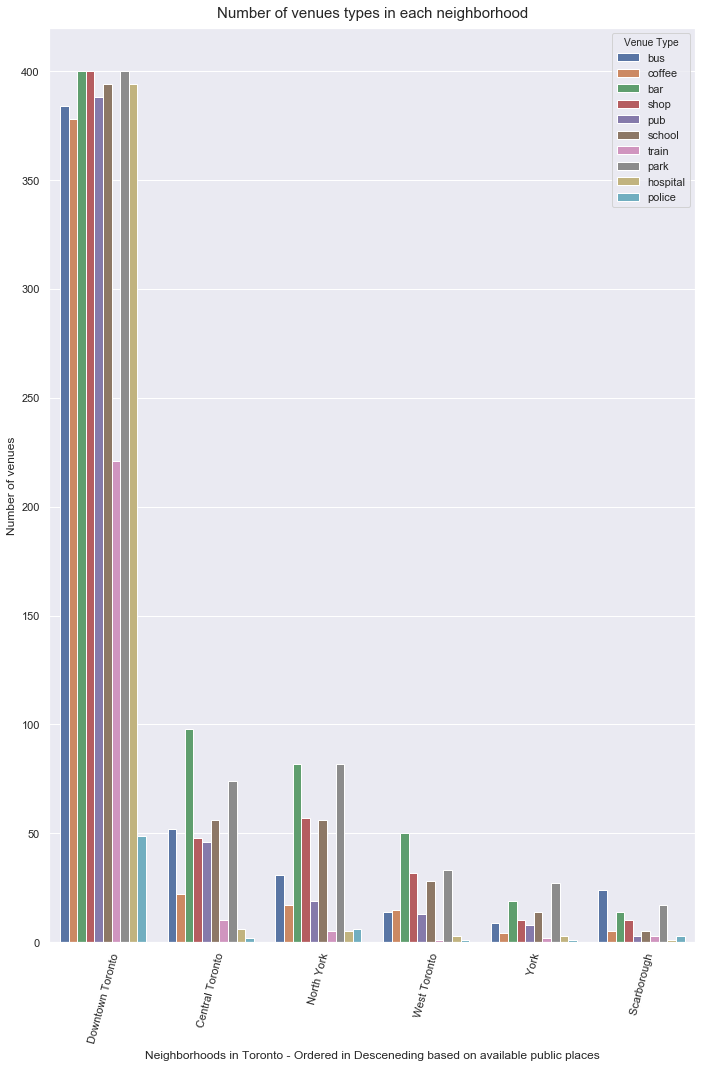

In [41]:
data['neighborhood'] = data['neighborhood'].apply(lambda x: x.split(',')[0])
data.rename(columns={'query': 'Venue Type'}, inplace = True)

sns.set(style='darkgrid')
plt.figure(figsize=(10,15))
neighborhoods = data['neighborhood'].apply(lambda x: x.split(',')[0])
sns.countplot(neighborhoods, data = data, hue = 'Venue Type', order = neighborhoods.value_counts().index)
plt.xticks(rotation=75)
plt.title('Number of venues types in each neighborhood', pad=10, fontsize = 15)
plt.ylabel('Number of venues')
plt.xlabel('Neighborhoods in Toronto - Ordered in Desceneding based on available public places')
plt.savefig("no_of_venues.jpg")
plt.tight_layout()

Observation:-
    From the above plot, we can visually verify that Downtown Toronto is the top neighborhood with highest number of public spaces.

### Scatter Plot of all the venues in Toronto

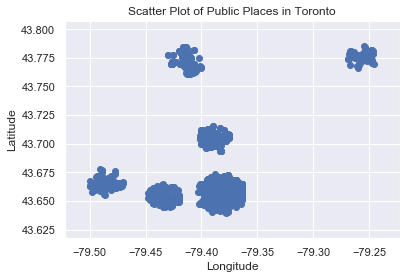

In [66]:
lat_data = data['lat']
lng_data = data['lng']
neighborhood = data['neighborhood'].apply(lambda x: x.split(',')[0])

plt.scatter(lng_data, lat_data)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Public Places in Toronto')
plt.savefig('Public_Places_Scatter_Plot.png')
plt.show()

### Details about the top venue

In [42]:
# Choosing the top two neighborhood by using visual analysis of the above graph
dtoronto = data[data['neighborhood'].apply(lambda x: 'Downtown Toronto' in x)]
dtoronto.head()

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,Venue Type,state
0,141 Bay St,Bus Station,CA,Toronto,Canada,at Front St,799,"[141 Bay St (at Front St), Toronto ON M5J 1J5,...",4ba17563f964a520ceb837e3,"[{'label': 'display', 'lat': 43.64565538508229...",43.645655,-79.377447,Union Station GO Bus Terminal,Downtown Toronto,M5J 1J5,bus,ON
1,NaN,Bus Line,CA,Toronto,Canada,NaN,719,"[Toronto ON, Canada]",4fad4358e4b00911a7296917,"[{'label': 'display', 'lat': 43.65597396661909...",43.655974,-79.384504,Bus To Niagara Falls,Downtown Toronto,NaN,bus,ON
2,NaN,Bus Line,CA,Toronto,Canada,NaN,784,"[Toronto ON, Canada]",4bda14603904a5934203459e,"[{'label': 'display', 'lat': 43.64577099686206...",43.645771,-79.376883,Bramalea Go Bus,Downtown Toronto,NaN,bus,ON
3,NaN,Bus Line,CA,NaN,Canada,NaN,786,[Canada],4b81e070f964a5204bc230e3,"[{'label': 'display', 'lat': 43.64575296961094...",43.645753,-79.376729,Lincolnville GO Bus - Northbound,Downtown Toronto,NaN,bus,NaN
4,NaN,Bus Line,CA,Toronto,Canada,NaN,835,"[Toronto ON, Canada]",4bf5b4e894b2a593e424acee,"[{'label': 'display', 'lat': 43.64811312219104...",43.648113,-79.384790,TTC Bus #143 - Beach Express,Downtown Toronto,NaN,bus,ON


## Visulaization of the Neighborhoods in Toronto

Here we use Folium Map visualization tool to see the neighborhoods in Totonto

In [48]:
general_location = geolocator.geocode('Toronto')
geolocator = Nominatim(user_agent="coursera_capstone_project", timeout=1000)
venues_map = folium.Map(location=[43.653908, -79.384293], zoom_start=11)

for neighborhood, location in locations.items():
    folium.CircleMarker(
        [location[0], location[1]],
        radius=5,
        color='red',
        popup=neighborhood,
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
    ).add_to(venues_map)
    
venues_map

## Visualizing public locations only in Downtown Toronto Neighborhood

In [8]:
downtown_data = data[data['neighborhood'] == ' Downtown Toronto']
downtown_data.head()

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,Venue Type,state
0,141 Bay St,Bus Station,CA,Toronto,Canada,at Front St,799,"['141 Bay St (at Front St)', 'Toronto ON M5J 1...",4ba17563f964a520ceb837e3,"[{'label': 'display', 'lat': 43.64565538508229...",43.645655,-79.377447,Union Station GO Bus Terminal,Downtown Toronto,M5J 1J5,bus,ON
1,NaN,Bus Line,CA,Toronto,Canada,NaN,719,"['Toronto ON', 'Canada']",4fad4358e4b00911a7296917,"[{'label': 'display', 'lat': 43.65597396661909...",43.655974,-79.384504,Bus To Niagara Falls,Downtown Toronto,NaN,bus,ON
2,NaN,Bus Line,CA,Toronto,Canada,NaN,784,"['Toronto ON', 'Canada']",4bda14603904a5934203459e,"[{'label': 'display', 'lat': 43.64577099686206...",43.645771,-79.376883,Bramalea Go Bus,Downtown Toronto,NaN,bus,ON
3,NaN,Bus Line,CA,NaN,Canada,NaN,786,['Canada'],4b81e070f964a5204bc230e3,"[{'label': 'display', 'lat': 43.64575296961094...",43.645753,-79.376729,Lincolnville GO Bus - Northbound,Downtown Toronto,NaN,bus,NaN
4,NaN,Bus Line,CA,Toronto,Canada,NaN,835,"['Toronto ON', 'Canada']",4bf5b4e894b2a593e424acee,"[{'label': 'display', 'lat': 43.64811312219104...",43.648113,-79.384790,TTC Bus #143 - Beach Express,Downtown Toronto,NaN,bus,ON


In [9]:
data_to_plot_on_map = []
for entry in downtown_data[['neighborhood', 'lat', 'lng', 'name']].iterrows():
    data_to_plot_on_map.append([entry[1][0], entry[1][1], entry[1][2], entry[1][3]])
print("Done, ", len(data_to_plot_on_map))

Done,  3408


In [13]:
geolocator = Nominatim(user_agent="coursera_capstone_project", timeout=1000)
general_location = geolocator.geocode('Toronto')
venues_map = folium.Map(location=[43.653908, -79.384293], zoom_start=15)

for entry in data_to_plot_on_map[:1000]:
    neighborhood, lat, lng, categories = entry
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color='red',
        popup=categories,
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
    ).add_to(venues_map)
    
venues_map

In [42]:
# data = pd.read_csv("foursquare_data.csv", index_col=0)

In [86]:
# To avoid repetitive ffoursquare calls, we save the results of the merged dataframe to a csv file
data.to_csv("foursquare_data.csv")

In [43]:
pd.read_csv("foursquare_data.csv", index_col=0).shape

(4554, 17)

# Clustering

In [68]:
set(neighborhood)

{' Central Toronto',
 ' Downtown Toronto',
 ' North York',
 ' Scarborough',
 ' West Toronto',
 ' York'}

In [73]:
# manual one hot encoding
y_true = []
encoded_neighborhood = {' Central Toronto':0,
                       ' Downtown Toronto':1,
                       ' North York':2,
                       ' Scarborough':3,
                       ' West Toronto':4,
                       ' York':5}
for n in neighborhood:
    y_true.append(encoded_neighborhood[n])
y_true[-4]

1

In [87]:
X = []
for entry in zip(lng_data, lat_data):
    X.append(list(entry))
X = np.array(X)
X

array([[-79.25774002,  43.77440618],
       [-79.25672181,  43.77469746],
       [-79.25910865,  43.77488906],
       ...,
       [-79.3846944 ,  43.6612227 ],
       [-79.384738  ,  43.657834  ],
       [-79.37235228,  43.6534796 ]])

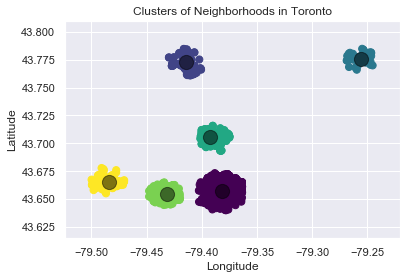

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Neighborhoods in Toronto')
plt.savefig('Clusters of Neighborhoods in Toronto.png')
plt.show()

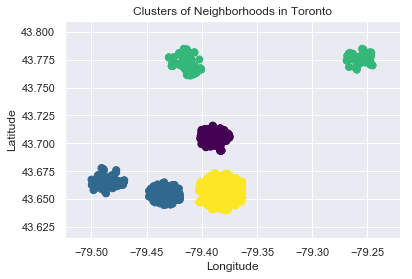

In [89]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Neighborhoods in Toronto')
plt.savefig('Clusters of Neighborhoods in Toronto Reduced clusters.png')
plt.show()

# Result

Downtown Toronto has more places in Toroto when compared to all remaining neighborhoods. So when a person wants to relocate based upon all the avilable public amenities they can recognize that Downtown Toronto is the best of all the avilable options.